### modifications since posted online:
A grammatical problem with the new rules for the surfer in problem 1 has been fixed.

Modified question 1c to make it answerable since I realized it must converge.

Clarified that in Qestion 2 you can assume the matrix has a full eigenspace.

Corrected 3c to say that $1/cd$ is the eigenvalue, not $cd$.

[Please ensure that the top of your assignment has the required comment on copying].

# Assigment 1

### Problem 1

Consider a directed network $G$.  So far we have written a function that calculates the vector $\vec{x}(n)$ of probabilities that a surfer is at each given node in $G$ at step $n$.  However, in doing this we made two assumptions I would like to change
- We have assumed that when the surfer jumps (or "teleports") without following an edge, it does so to any node with equal probability.
- We have assumed that all nodes in $G$ have at least one edge going out.


Consider now a different pair of rules for the surfer:
- when the surfer jumps/teleports, he/she goes to pages with a weighted probability provided by a dict input to the function.
- if the surfer arrives at a node with no out edges, he/she jumps/teleports with probability 1, not $\alpha$.

Given these rules:
##### Part a

Please **write a function** that can be called by

  `Personalized_PageRank(G, alpha, teleport_weights, iterations)`

where the inputs satisfiy
- `G` is a graph
- `alpha` is a number between 0 and 1 (as before)
- `teleport_weights` is a dict where `teleport_weights[node]` is the probability of arriving at `node` given that the surfer is jumping.
- `iterations` is the number of iterations to do.

The function should return $\vec{x}($ `iterations` $)$.  

There is more than one way such an algorithm could be implemented, one of which is based on matrix multiplication.  **Do not use matrix multiplication**.

Be sure to **comment your code** and be sure that you **deal with nodes with no out-edges**.  



##### Part b

Assume $\alpha>0$, and state a condition on `teleport_weights` that would guarantee that the output of your algorithm converges regardless of `G` as `iterations` $\to \infty$.



##### Part c

[this replaces the previous **part c** and is **optional** - when I wrote the previous **part c** I had two different examples muddled in my memory]

As in part (b), assume $\alpha>0$ and state a condition on `teleport_weights` that would guarantee the algorithm assigns **positive weight** to all nodes as `iterations` $\to \infty$.

Assume $\alpha>0$ and find an example `G` and `teleport_weights` that give `0` weight to some nodes.

### Problem 2

Now consider the case where the surfer jumps to all pages with equal probability again, and for simplicity assume that all nodes in $G$ have at least one edge going out.

In class we derived a matrix $P$ such that $\vec{x}(n) = P \vec{x}(n-1)$ for a specific matrix $P$.

Let's assume that instead of jumping in equally spaced intervals, the surfer can move at any time, and does so with rate $1$.  If the surfer moves, then with probability $\alpha$ he/she jumps to a random page.  Otherwise he/she follows a randomly chosen link.

- **Find a matrix $Q$** such that $\frac{d}{dt} \vec{x} = Q \vec{x}$.

- Assume that as $t \to \infty$, we have $\frac{d}{dt} \vec{x} \to \vec{0}$, so the vector of probabilities approaches a constant.  **How is $\lim_{t\to \infty} \vec{x}(t)$ related to $Q$**?

- **Prove that** if $\alpha>0$ then in fact $\vec{x}(t)$ does go to a constant value.

(you may assume that all eigenvalues of $Q$ have a full eigenspace)

### Problem 3

Besides PageRank, there are other algorithms used for ranking websites. Consider HITS (Hypertext-Induced-Topic-Search) which is based on the idea that webpages play two roles: they provide information themselvesand they link to other pages that have useful information. We assign page $i$ two weights $a_i$ and $h_i$ representing its "authority" and "hub" weights. We assume that a page's hub weight is proportional to the sum of the authority weights of the pages that it links to, and its authority weight is proportional to the sum of the hub weights of the pages linking to it. The weights are normalized so that $\sum_i h_i = 1$ and $\sum_i a_i = 1$.



##### Part a
Explain why 
$h_i = c \sum_{j} A_{ij} a_j$ for all $i$, where $A_{ij}$ is 1 if there is a link from $i$ to $j$ and 0 otherwise (the direction is important) and c is a normalization constant equal to $1/\sum_i \sum_j A_{ij}a_j$.



##### Part b
Similarly explain why $a_i = d \sum_j A_{ji}h_j$ where $d = 1/\sum_i \sum_j A_{ji} h_j$.



##### Part c
Use this to show that $\vec{a} = cdA^T A \vec{a}$, and thus $1/cd$ must be an eigenvalue and $\vec{a}$ an eigenvector of $A^TA$.


For the HITS algorithm, we start with an initial guess for $\vec{a}$, denoted $\vec{a}(0)$.  Then we calculate $A\vec{a}(0)$ and normalize the
resulting vector to sum to 1 to give $\vec{h}(0)$. Then we find $A^T\vec{h}(0)$ and normalize it to sum to 1, giving $\vec{a}(1)$. The
limit of $\vec{a}$ as this process is repeated is considered to give the authority weights of the page.

##### Part d

Write a function

`HITS_auth(G, initial_weights, iterations)`

for which 
- `G` is a directed graph
- `initial_weights` is a dict such that `initial_weights[node]` gives the initial authority weight assigned to `node`.
- `iterations` is the number of iterations to perform [so we find $\vec{a}($ `iterations` $)$].

It should return $\vec{a}($ `iterations` $)$.

This method **should not rely on matrix multiplication**.  You will use it below.  You should probably check a few calculations by hand.



Consider the following network:

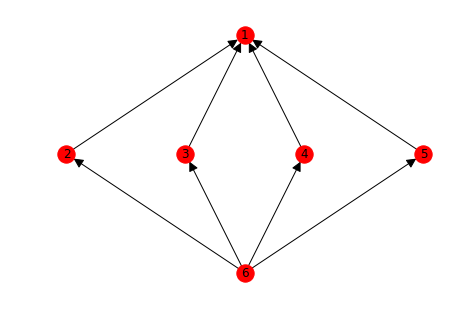

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([(6,2), (6,3), (6,4), (6,5), (2,1), (3,1), (4,1), (5,1)])

#you don't need to worry about how I'm defining `pos` here.  It's just
#so that you can see the network structure more clearly.
pos = {1:(0,0), 2:(-3,-2), 3:(-1,-2), 4:(1,-2), 5:(3,-2), 6:(0,-4)}

nx.draw(G, pos, with_labels = True, arrowsize=20)
plt.show()

##### Part e

By starting with the initial guess that all nodes have authority weight $1/6$, calculate the HITS authority weights after 50 iterations.

##### Part f

Now take a different initial guess with the authority weight of page 1 equal to $1/3$, the weights of pages
2, 3, 4, and 5 all equal to $1/12$ and the weight of page 6 equal to $1/3$. Use 50 iterations to calculate the
HITS authority weights. You should get a different answer.

##### Part g

Calculate the **`PageRank`** of `G` with $\alpha = 0.1$ and 50 iterations.  Then add a node $7$ to `G` with edges to 2, 3, 4, and 5 and recalculate the PageRank.  Comment on how the ranking of the nodes changes for these two networks.  


(if you go back and recalculate anything above, make sure you reset `G`)

#### Part h

Find the HITS authority weights assuming an initial guess of $1/7$ for all pages in this new network.

Then find the HITS authority weights assuming an initial guess with the authority weight of page 1 equal to $1/3$, the weights of pages 2, 3, 4, and 5 all $1/12$ and the weights of pages 6 and 7 both $1/6$.

Comment on how this is similar or different to what you saw for the authority weights of the original network.

##### Part i

Calculate the eigenvalues of $A^TA$ for the two versions of the network (you can do this numerically with numpy or matlab). 

Use the results to explain why it is possible for the final result to depend on the starting point for HITS on the first network, but not for
the modified network.  